In [1]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

In [2]:
# Functions with use

# Core Python

## append() -- Adds its argument as a single element to the end of a list. The length of the list increases by one.
## enumerate() -- Enumerate() method adds a counter to an iterable and returns it in a form of enumerating object. This enumerated object can then be used directly for loops or converted into a list of tuples using the list() method.
## hist() -- Plot a histogram, {bins = bars of histogram }
## legend() --  aPlace a legend on the Axes.
## xlabel/ylabel -- labels for axes

# Numpy

## np.abs() -- Calculate the absolute value element-wise.

# Scipy

## stats.zscore -- this function computes the relative Z-score of the input data, relative to the sample mean and standard deviation.

# Pandas

## read_csv -- Used to read a csv file
## DataFrame.head() -- Print dataset n number of rows
## DataFrame.info() -- Prints metadata
## DataFrame.shape() -- Prints Dimensionality
## DataFrame.isnull() -- Return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. 
## DataFrame.sum -- Return the sum of the values over the requested axis.
## DataFrame.isnull().sum() -- Return the number of missing values in the data set.
## DataFrame.target -- TBF
## DataFrame.value_counts() -- Return a Series containing counts of unique rows in the DataFrame.
## DataFrame.loc() -- Access a group of rows and columns by label(s) or a boolean array.
## DataFrame.columns() -- Return the column labels of the given Dataframe.
## DataFrame.quantile() -- Return values at the given quantile over requested axis.
## DataFrame.all() -- Return whether all elements are True, potentially over an axis.
## DataFrame.corr() -- Compute pairwise correlation of columns, excluding NA/null values.
## DataFrame.drop() -- Drop specified labels from rows or columns.
## DataFrame.corrwith() -- Compute pairwise correlation.
## DataFrame.describe() -- Generate descriptive statistics.
## get_dummies() -- Convert categorical variable into dummy/indicator variables.

# Matplotlib.pyplot

## figure() -- Create a new figure, or activate an existing figure.
## subplot() -- Add an Axes to the current figure or retrieve an existing Axes.
## tight_layout() -- Adjust the padding between and around subplots.

# Seaborn --> sns

## heatmap() -- Plot rectangular data as a color-encoded matrix.
## set_context() -- Set the parameters that control the scaling of plot elements.
## pairplot() -- Plot pairwise relationships in a dataset.

# sklearn.preprocessing

## StandardScaler() -- Standardize features by removing the mean and scaling to unit variance.
    ### fit_transform() -- Fit to data, then transform it.


# To use hvplot it is necessary to define bars using pandas.DataFrame.loc and then combine bars created using syntax: (bar1 * bar2).opts(plot options...)

In [3]:
# Load Dataset
df = pd.read_csv("heart_disease.csv")

In [4]:
# Print dataset n number of rows
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [5]:
# Dataset info (metadata)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Dataset Dimensionality analysis
df.shape

(1025, 14)

In [7]:
# Feature Engineering

In [8]:
## NULL analysis

df.isnull().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
### Plot

df.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count', 
    width=500, height=350
)

### Evaluating according to gender/sex

with_disease = df.loc[df['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Sex.I  :Bars   [index]   (sex)
   .Bars.Sex.II :Bars   [index]   (sex)

In [10]:
### Evaluating according to chest pain

with_disease = df.loc[df['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4)
without_disease = df.loc[df['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4)

(without_disease * with_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Cp.I  :Bars   [index]   (cp)
   .Bars.Cp.II :Bars   [index]   (cp)

In [11]:
### Evaluating according to fasting blood sugar

with_disease = df.loc[df['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * with_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)


:Overlay
   .Bars.Fbs.I  :Bars   [index]   (fbs)
   .Bars.Fbs.II :Bars   [index]   (fbs)

In [12]:
### Evaluating according to resting ECG

with_disease = df.loc[df['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 
without_disease = df.loc[df['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4) 

(without_disease * without_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results', 
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Restecg.I  :Bars   [index]   (restecg)
   .Bars.Restecg.II :Bars   [index]   (restecg)

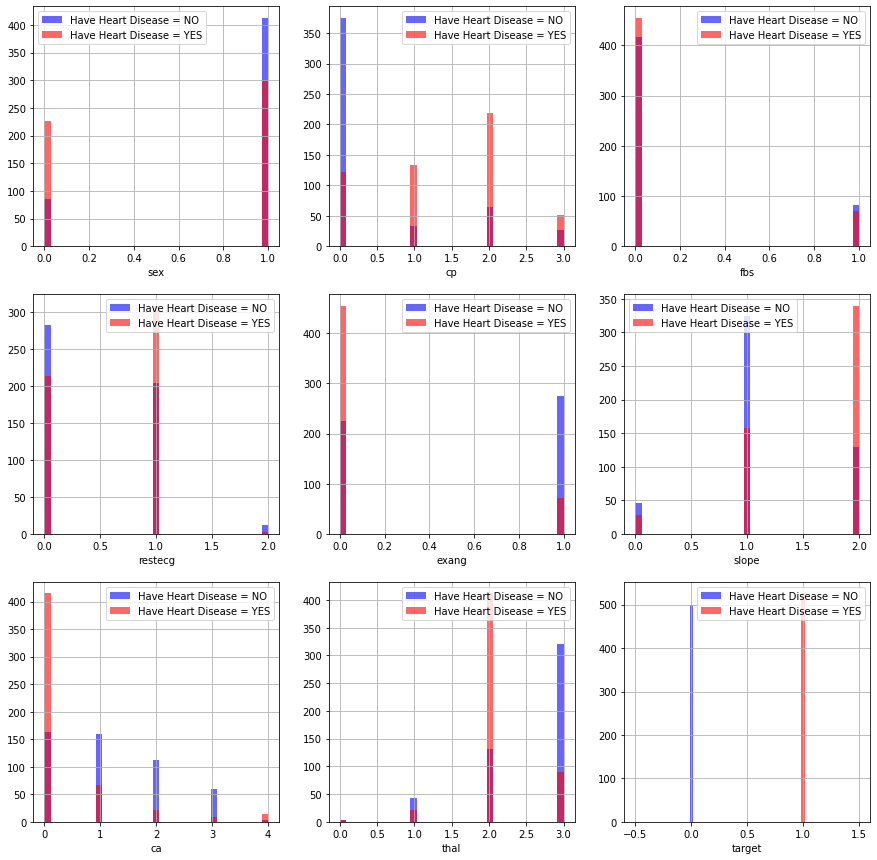

In [13]:
## Extracting and Exploring Categorical Variables

### Categorical Variable Analysis is done to see distint groups of datapoints, while continuous variable analysis is done to see trends

cat_val = []
cont_val = []

for column in df.columns:
    if len(df[column].unique()) <= 10:
            cat_val.append(column)
    else:
        cont_val.append(column)
        
cat_val

plt.figure(figsize=(15, 15))

for i, column in enumerate(cat_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

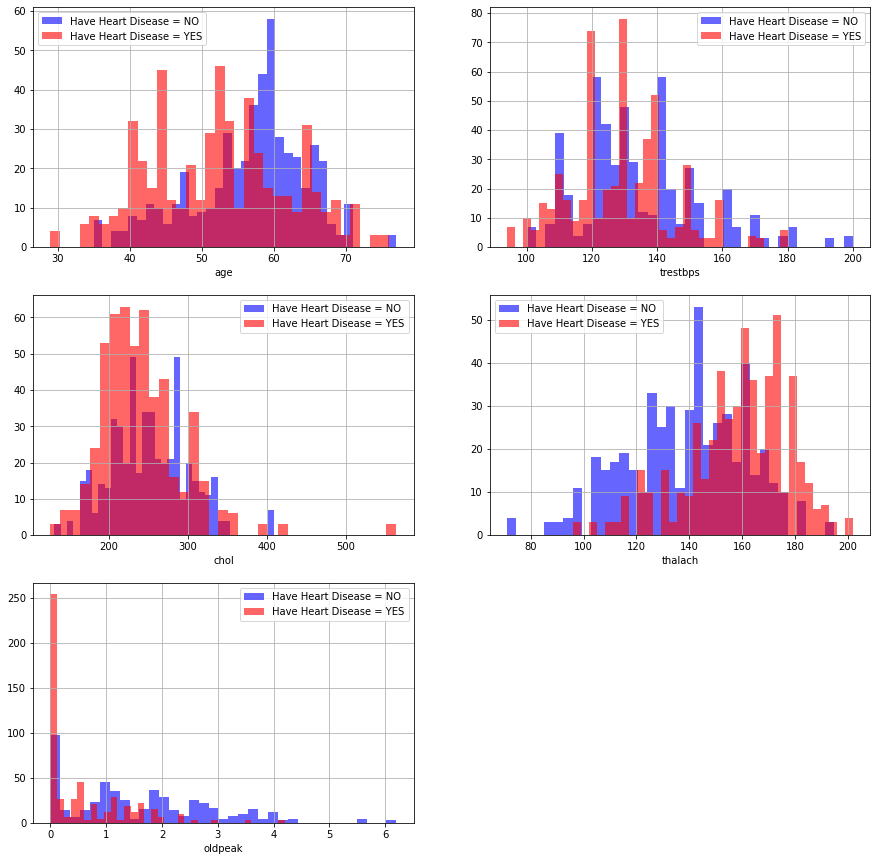

In [14]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(cont_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

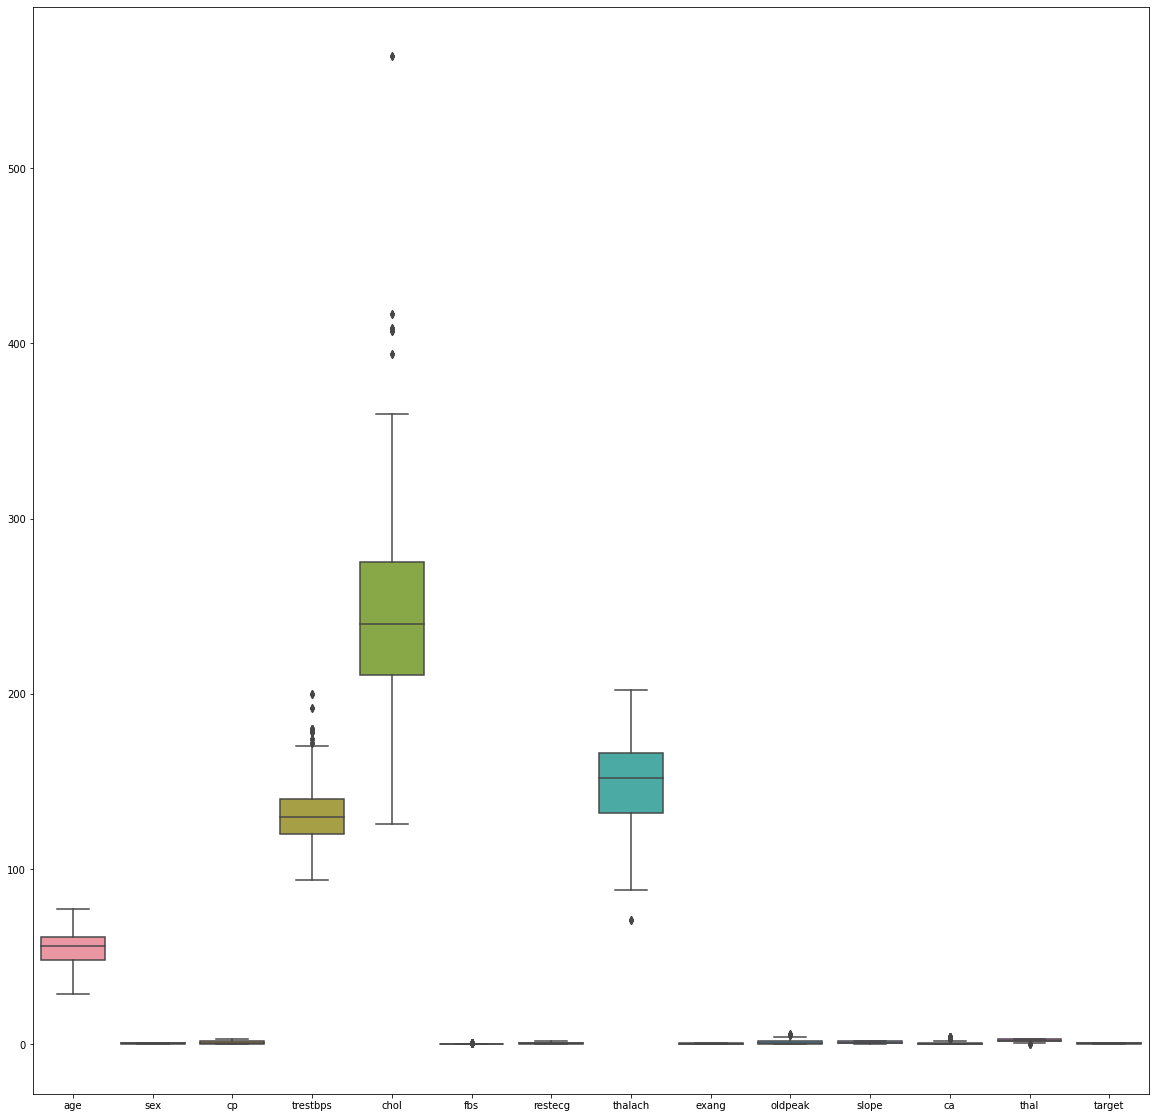

In [15]:
# Outlier Exploration

## Analysis

plt.figure(figsize=(20,20))
ax=sns.boxplot(data=df)

In [16]:
## Outlier Removal

from scipy import stats
zscore = np.abs(stats.zscore(df))
print(zscore)

           age       sex        cp  trestbps      chol       fbs   restecg  \
0     0.268437  0.661504  0.915755  0.377636  0.659332  0.418878  0.891255   
1     0.158157  0.661504  0.915755  0.479107  0.833861  2.387330  1.004049   
2     1.716595  0.661504  0.915755  0.764688  1.396233  0.418878  0.891255   
3     0.724079  0.661504  0.915755  0.936037  0.833861  0.418878  0.891255   
4     0.834359  1.511706  0.915755  0.364875  0.930822  2.387330  0.891255   
...        ...       ...       ...       ...       ...       ...       ...   
1020  0.503520  0.661504  0.055931  0.479107  0.484803  0.418878  0.891255   
1021  0.613800  0.661504  0.915755  0.377636  0.232705  0.418878  1.004049   
1022  0.819834  0.661504  0.915755  1.234378  0.562371  0.418878  1.004049   
1023  0.488996  1.511706  0.915755  1.234378  0.155137  0.418878  1.004049   
1024  0.047877  0.661504  0.915755  0.663216  1.124743  0.418878  0.891255   

       thalach     exang   oldpeak     slope        ca      tha

In [17]:
## Printing z-score with third standard deviation

threshold = 3
print(np.where(zscore > 3))

(array([ 14,  52,  54,  55,  69,  83, 123, 128, 151, 158, 175, 179, 192,
       208, 242, 246, 267, 290, 294, 296, 319, 326, 329, 340, 348, 359,
       378, 393, 417, 428, 450, 464, 465, 481, 508, 521, 526, 559, 597,
       613, 641, 665, 685, 686, 688, 734, 743, 749, 831, 833, 889, 893,
       958, 970, 993, 996], dtype=int64), array([12, 11,  9,  9,  9, 11,  4, 11,  3,  4,  3,  4,  4, 11, 11,  3,  7,
       11,  3,  7, 12,  3, 12, 11, 11, 12,  7,  9, 11, 11,  4,  4, 11,  4,
        3, 11,  9,  7, 11,  9,  4,  4,  4, 12,  3, 12, 11, 11, 11,  9,  4,
       12,  4, 11, 11,  4], dtype=int64))


In [18]:
## Calculating inter-quartile range

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1
print(IQR)

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [19]:
## Printing dimensionality of zscore dataframe with zscore less than 3 (ideal)

df = df[(zscore < 3).all(axis=1)]
df.shape

(969, 14)

In [20]:
## Printing dimensionality by removing outliers

df=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(769, 14)

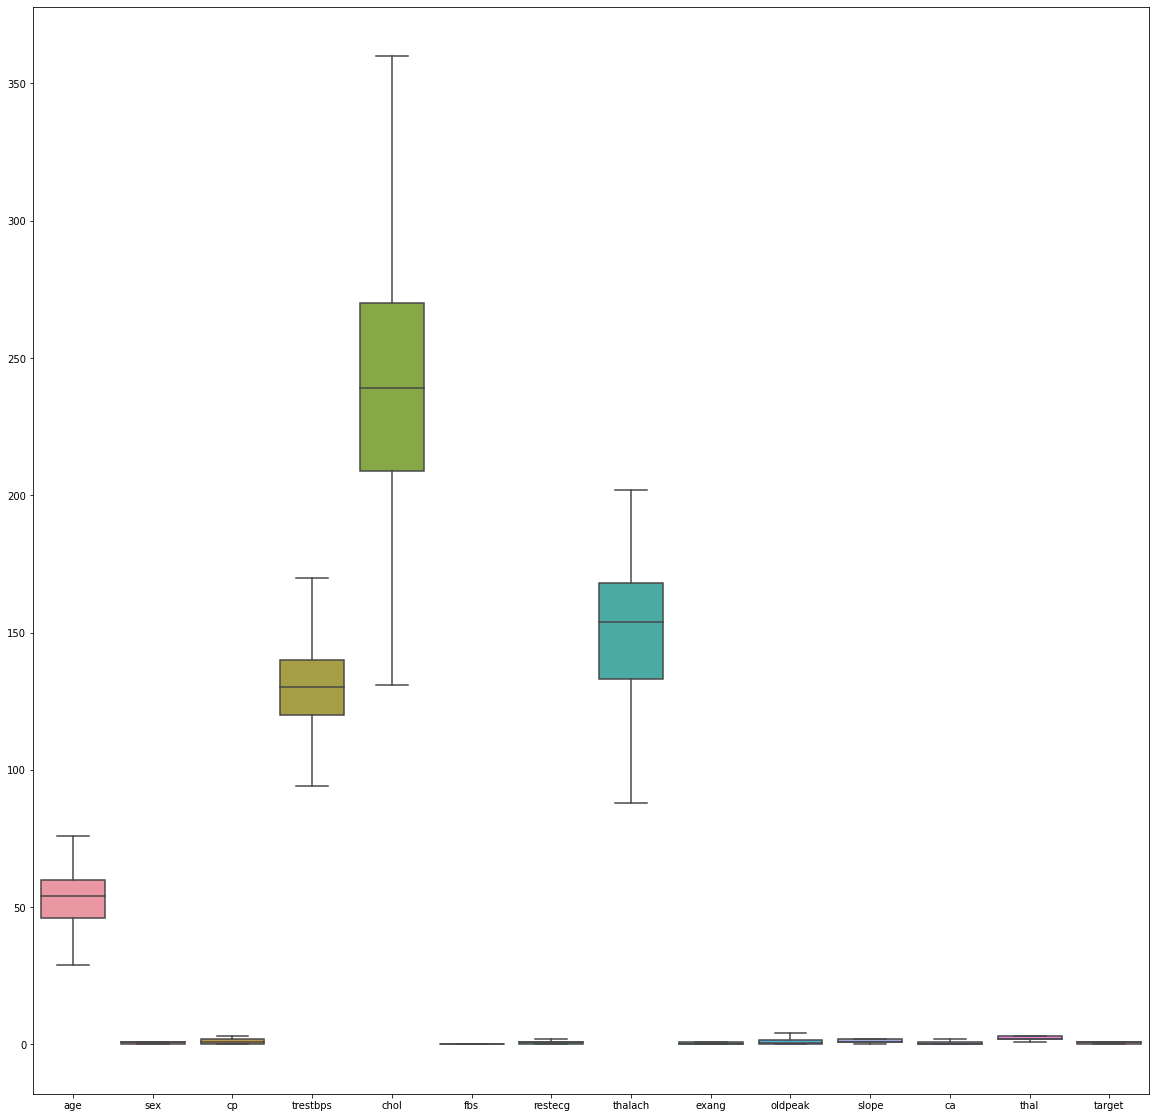

In [21]:
# Plot to check whether the outlier's are removed

plt.figure(figsize=(20,20))
ax= sns.boxplot(data=df)

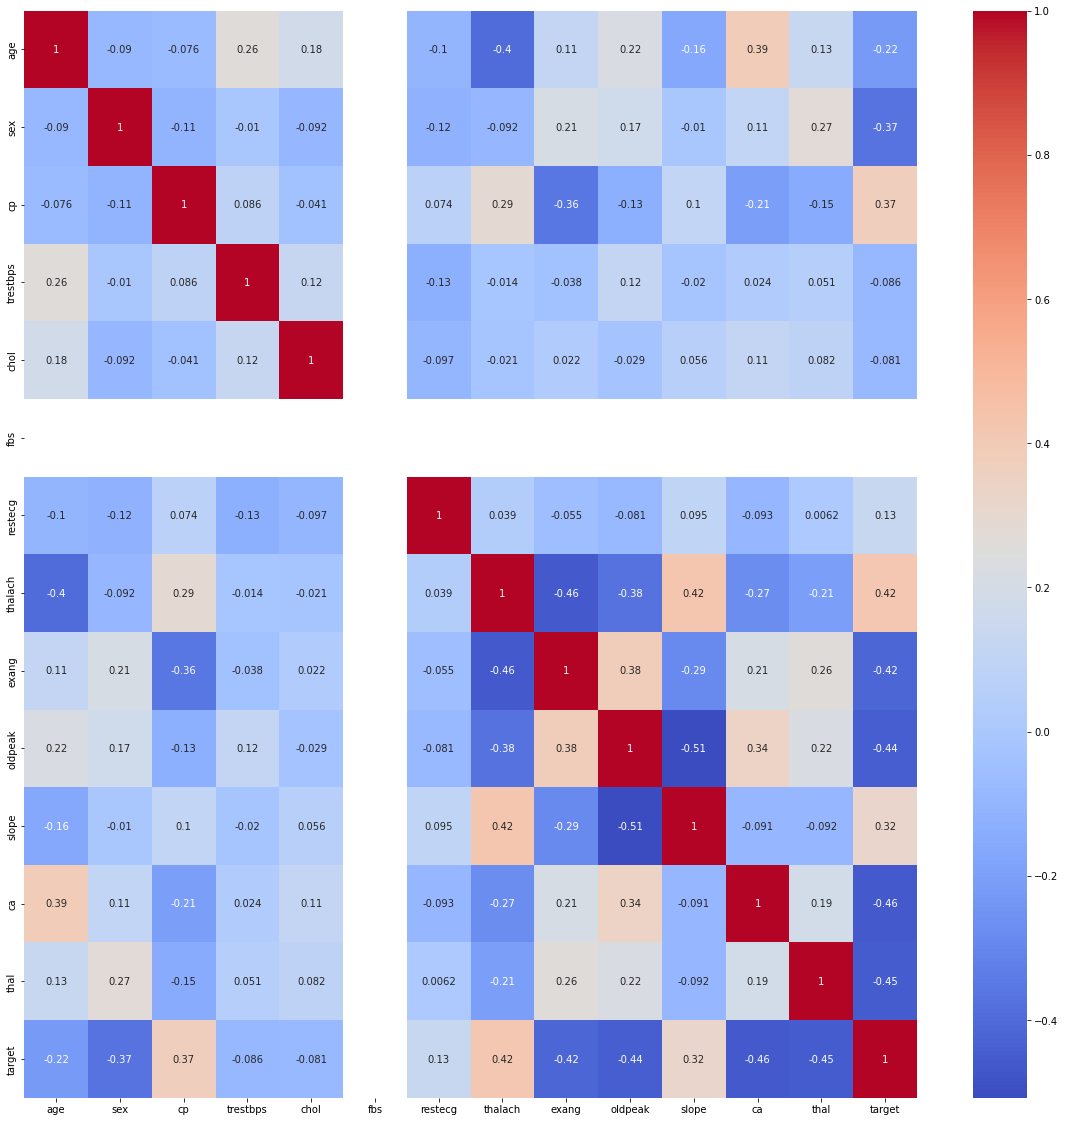

In [23]:
# Correlation Analysis and Feature Selection

plt.figure(figsize=(20,20))
corr = sns.heatmap(df.corr(), cmap="coolwarm", annot=True)

In [24]:
# Feature Scaling Prep

sns.set_context('notebook', font_scale = 2.3)


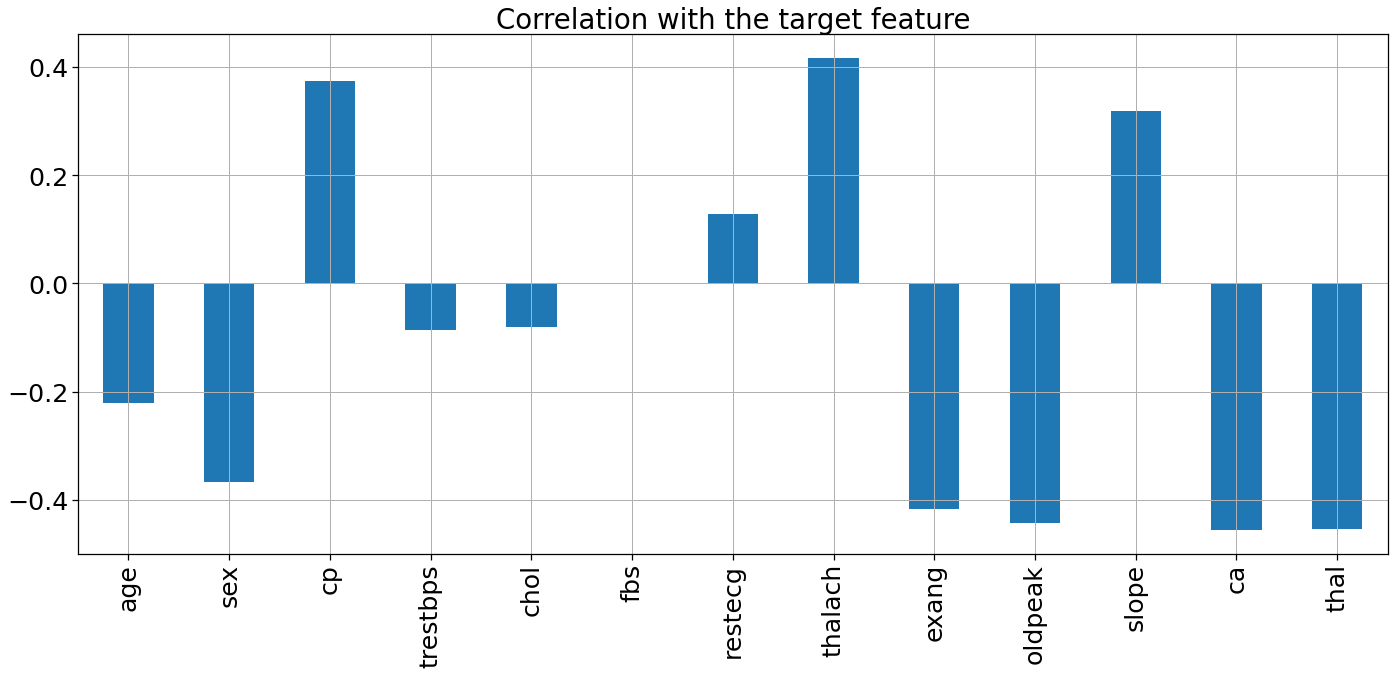

In [25]:
# Label Dropping

df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10), 
                                                        title="Correlation with the target feature")

plt.tight_layout()

In [26]:
# Exploring descriptive statistics of dataframe

df.describe()

age         sex          cp    trestbps        chol    fbs  \
count  769.000000  769.000000  769.000000  769.000000  769.000000  769.0   
mean    53.431730    0.691808    0.924577  128.685306  242.075423    0.0   
std      9.225098    0.462047    1.019105   15.314066   44.521145    0.0   
min     29.000000    0.000000    0.000000   94.000000  131.000000    0.0   
25%     46.000000    0.000000    0.000000  120.000000  209.000000    0.0   
50%     54.000000    1.000000    1.000000  130.000000  239.000000    0.0   
75%     60.000000    1.000000    2.000000  140.000000  270.000000    0.0   
max     76.000000    1.000000    3.000000  170.000000  360.000000    0.0   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  769.000000  769.000000  769.000000  769.000000  769.000000  769.000000   
mean     0.551365  150.669701    0.323797    0.972432    1.438231    0.495449   
std      0.515667   22.567898    0.468228    1.050258    0.589973    0.705479   
min      0.000000   88.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  154.000000    0.000000    0.600000    1.000000    0.000000   
75%      1.000000  168.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    4.000000    2.000000    2.000000   

             thal      target  
count  769.000000  769.000000  
mean     2.331599    0.548765  
std      0.568764    0.497940  
min      1.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [28]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
data = pd.get_dummies(df, columns=['sex', 'cp', 'fbs','restecg','exang','slope','ca','thal' ])
columns_to_scale=['age','trestbps', 'chol', 'thalach', 'oldpeak']
data[columns_to_scale] = stdScaler.fit_transform(data[columns_to_scale])

In [29]:
# Exploring dataset

data.head()

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0 -0.155300 -0.240805 -0.675971  0.768418  0.026266       0      0      1   
2  1.797168  1.066034 -1.530053 -1.138183  1.550693       0      0      1   
3  0.820934  1.262060 -0.878254  0.458041 -0.926501       0      0      1   
5  0.495523 -1.874354  0.133160 -1.271202  0.026266       1      1      0   
7  0.170111  2.046163  1.054670 -0.251392 -0.164287       0      0      1   

   cp_0  cp_1  ...  exang_1  slope_0  slope_1  slope_2  ca_0  ca_1  ca_2  \
0     1     0  ...        0        0        0        1     0     0     1   
2     1     0  ...        1        1        0        0     1     0     0   
3     1     0  ...        0        0        0        1     0     1     0   
5     1     0  ...        0        0        1        0     1     0     0   
7     1     0  ...        1        0        1        0     0     1     0   

   thal_1  thal_2  thal_3  
0       0       0       1  
2       0       0       1  
3       0       0       1  
5       0       1       0  
7       0       0       1  

[5 rows x 27 columns]

In [30]:
# Exploring descriptive stats

data.describe()

age      trestbps          chol       thalach       oldpeak  \
count  7.690000e+02  7.690000e+02  7.690000e+02  7.690000e+02  7.690000e+02   
mean   2.436463e-16  8.494866e-16  2.422567e-16 -5.298464e-16  1.705037e-16   
std    1.000651e+00  1.000651e+00  1.000651e+00  1.000651e+00  1.000651e+00   
min   -2.650122e+00 -2.266405e+00 -2.496515e+00 -2.778747e+00 -9.265009e-01   
25%   -8.061233e-01 -5.675147e-01 -7.433984e-01 -7.834669e-01 -9.265009e-01   
50%    6.164057e-02  8.590468e-02 -6.912276e-02  1.476640e-01 -3.548407e-01   
75%    7.124635e-01  7.393241e-01  6.276288e-01  7.684180e-01  5.979264e-01   
max    2.447991e+00  2.699582e+00  2.650456e+00  2.275963e+00  2.884567e+00   

           target       sex_0       sex_1        cp_0        cp_1  ...  \
count  769.000000  769.000000  769.000000  769.000000  769.000000  ...   
mean     0.548765    0.308192    0.691808    0.483745    0.183355  ...   
std      0.497940    0.462047    0.462047    0.500061    0.387209  ...   
min      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    0.000000  ...   
50%      1.000000    0.000000    1.000000    0.000000    0.000000  ...   
75%      1.000000    1.000000    1.000000    1.000000    0.000000  ...   
max      1.000000    1.000000    1.000000    1.000000    1.000000  ...   

          exang_1     slope_0     slope_1     slope_2        ca_0        ca_1  \
count  769.000000  769.000000  769.000000  769.000000  769.000000  769.000000   
mean     0.323797    0.050715    0.460338    0.488947    0.628088    0.248375   
std      0.468228    0.219558    0.498749    0.500203    0.483630    0.432351   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    1.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

             ca_2      thal_1      thal_2      thal_3  
count  769.000000  769.000000  769.000000  769.000000  
mean     0.123537    0.050715    0.566970    0.382315  
std      0.329267    0.219558    0.495817    0.486269  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000    0.000000  
75%      0.000000    0.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000    1.000000  

[8 rows x 27 columns]

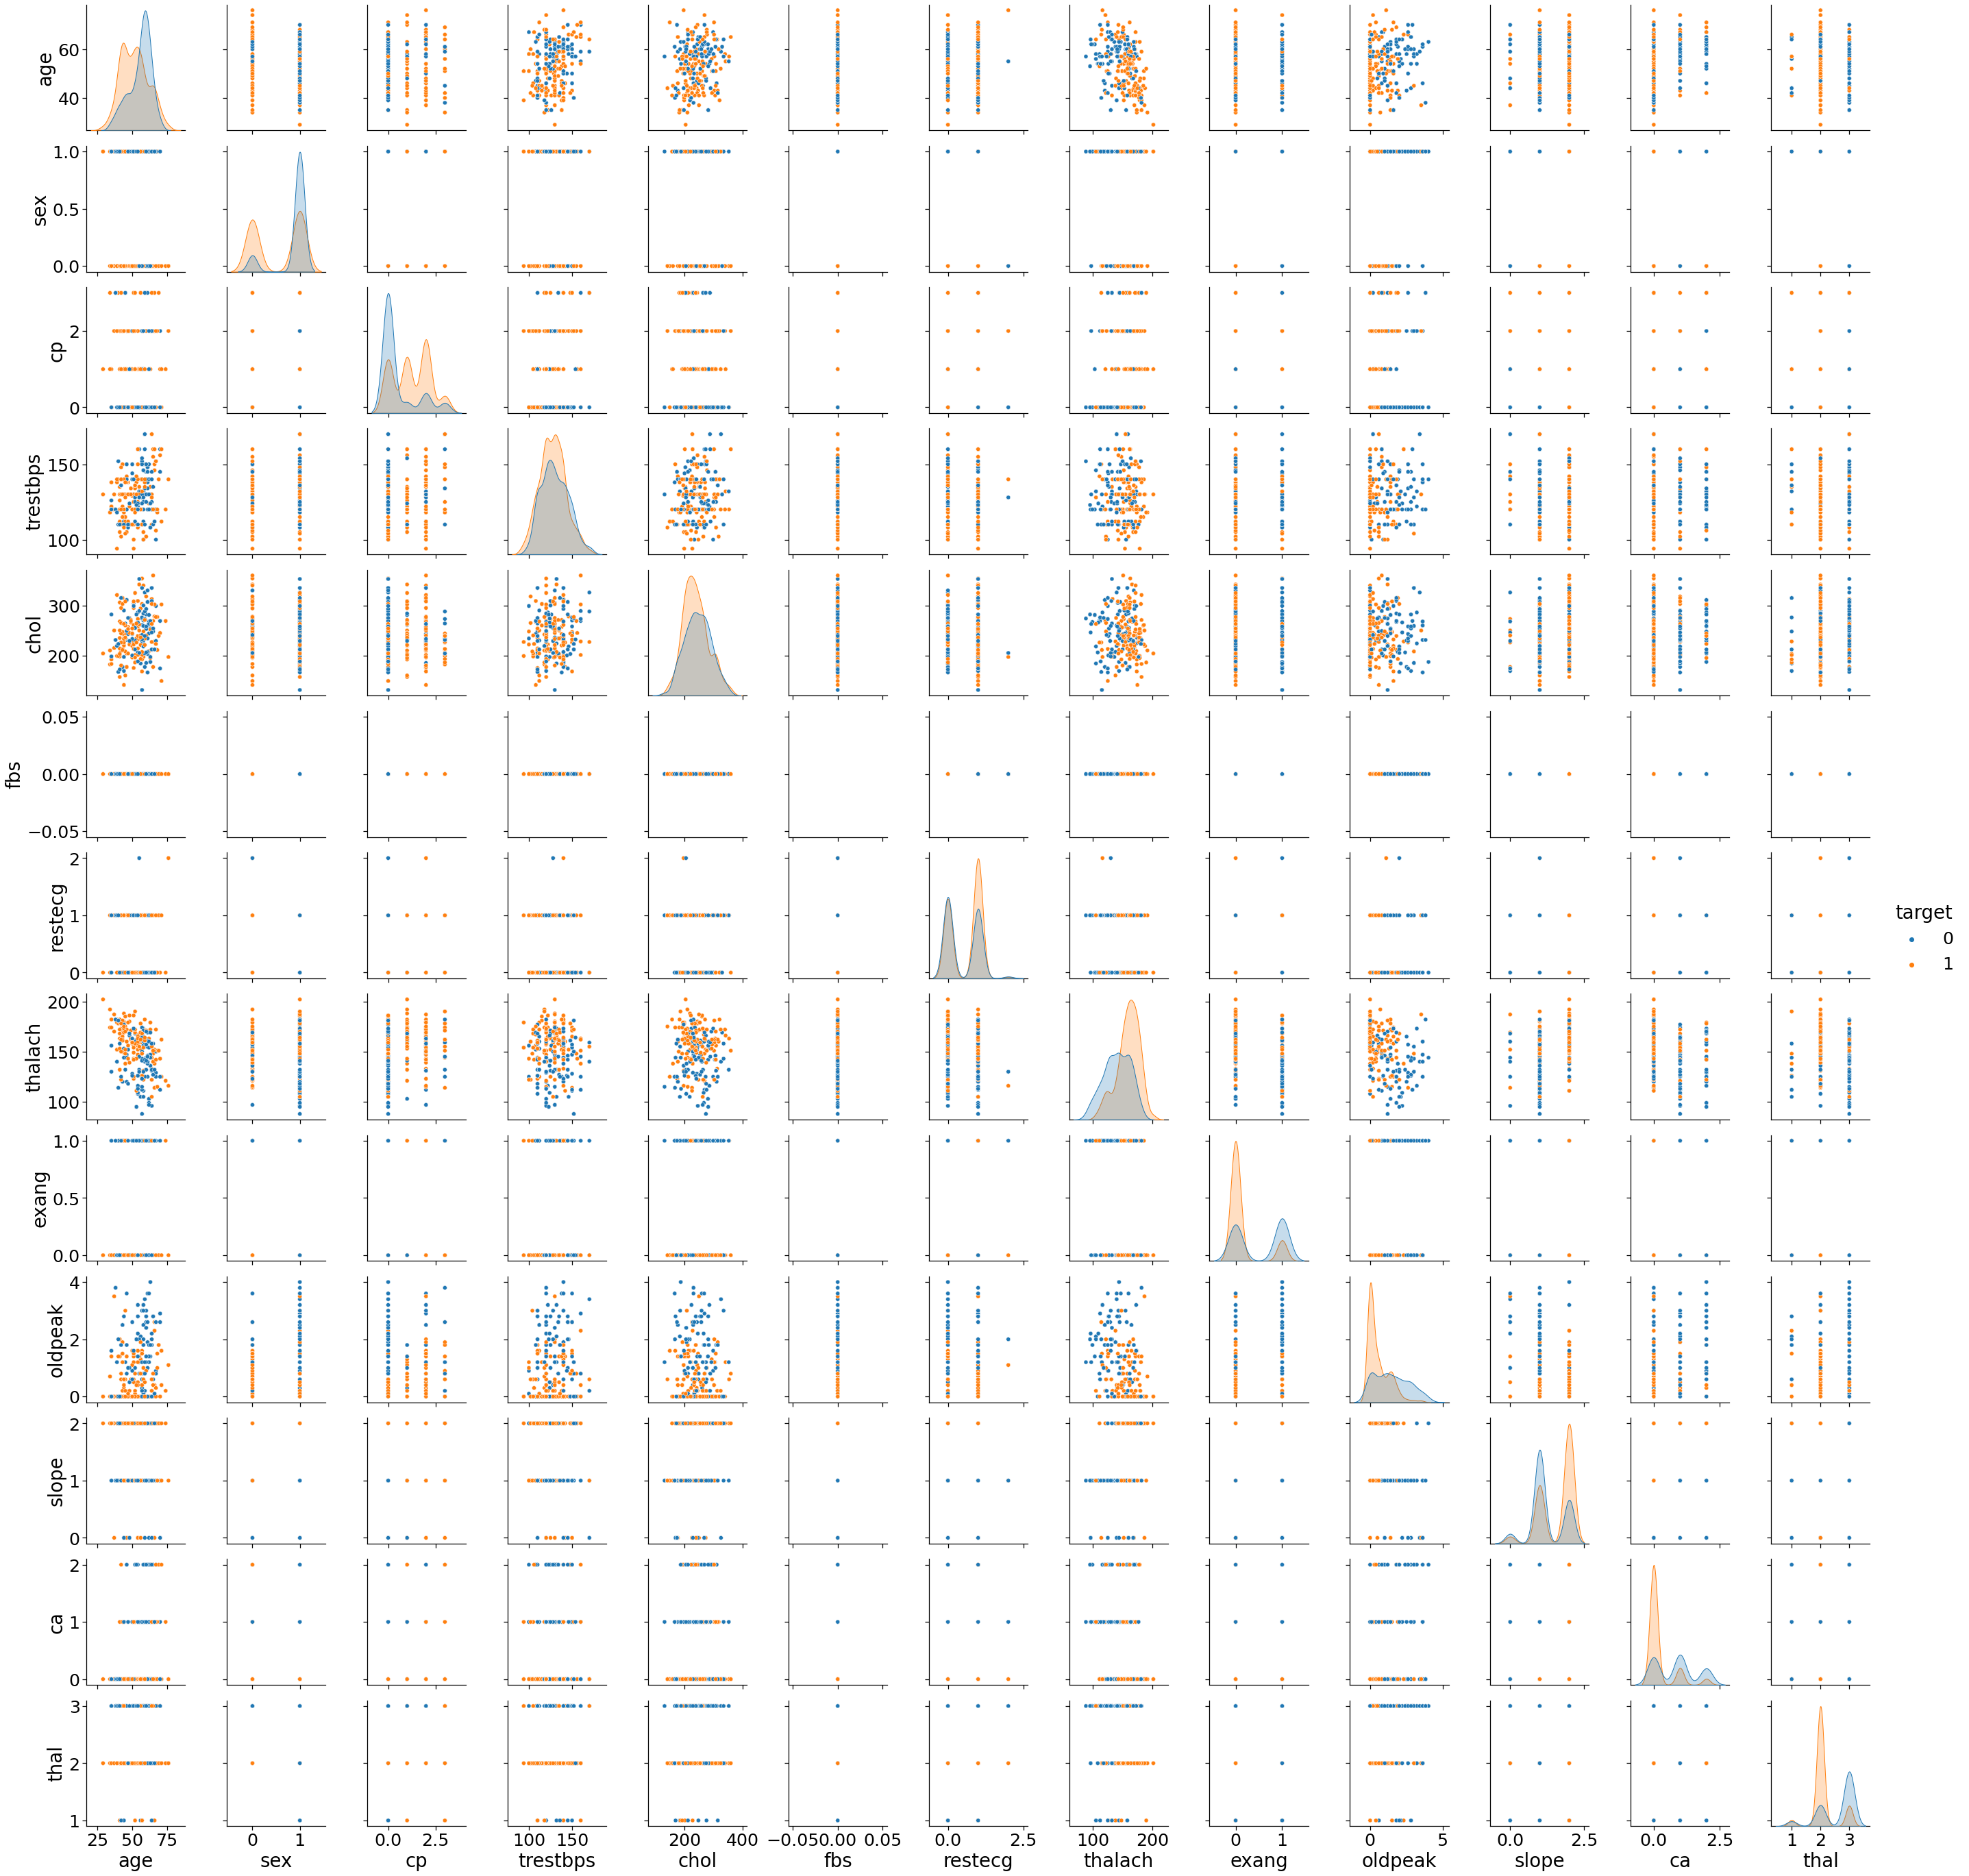

In [31]:
# Data Visualization

sns.pairplot(df, hue="target", height=3, aspect=1);